# Wrapping Up Linear Regression: 

## Reviewing the workflow, findings/interpretation, handling interactions, & the need for more powerful models

We'll begin by running a simple OLS regression on the Ames housing data we've seen before.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression, Lasso, Ridge
import statsmodels.api as sm
import statsmodels.formula.api as smf 

# Load in the Ames Housing Data
datafile = "../../week02-luther1/02-regression_scrape/data/Ames_Housing_Data.tsv"
df=pd.read_csv(datafile, sep='\t')

# This is recommended by the data set author to remove a few outliers
df = df.loc[df['Gr Liv Area']<=4000,:]

# Focus on select columns
df = df.loc[:,['Lot Area','Overall Qual','Overall Cond', 'Year Built', 'Year Remod/Add',
               'Gr Liv Area','Full Bath', 'Bedroom AbvGr','Fireplaces', 'Garage Cars','SalePrice']]
df = df.dropna()
df.head(3)

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
0,31770,6,5,1960,1960,1656,1,3,2,2.0,215000
1,11622,5,6,1961,1961,896,1,2,0,1.0,105000
2,14267,6,6,1958,1958,1329,1,3,0,1.0,172000


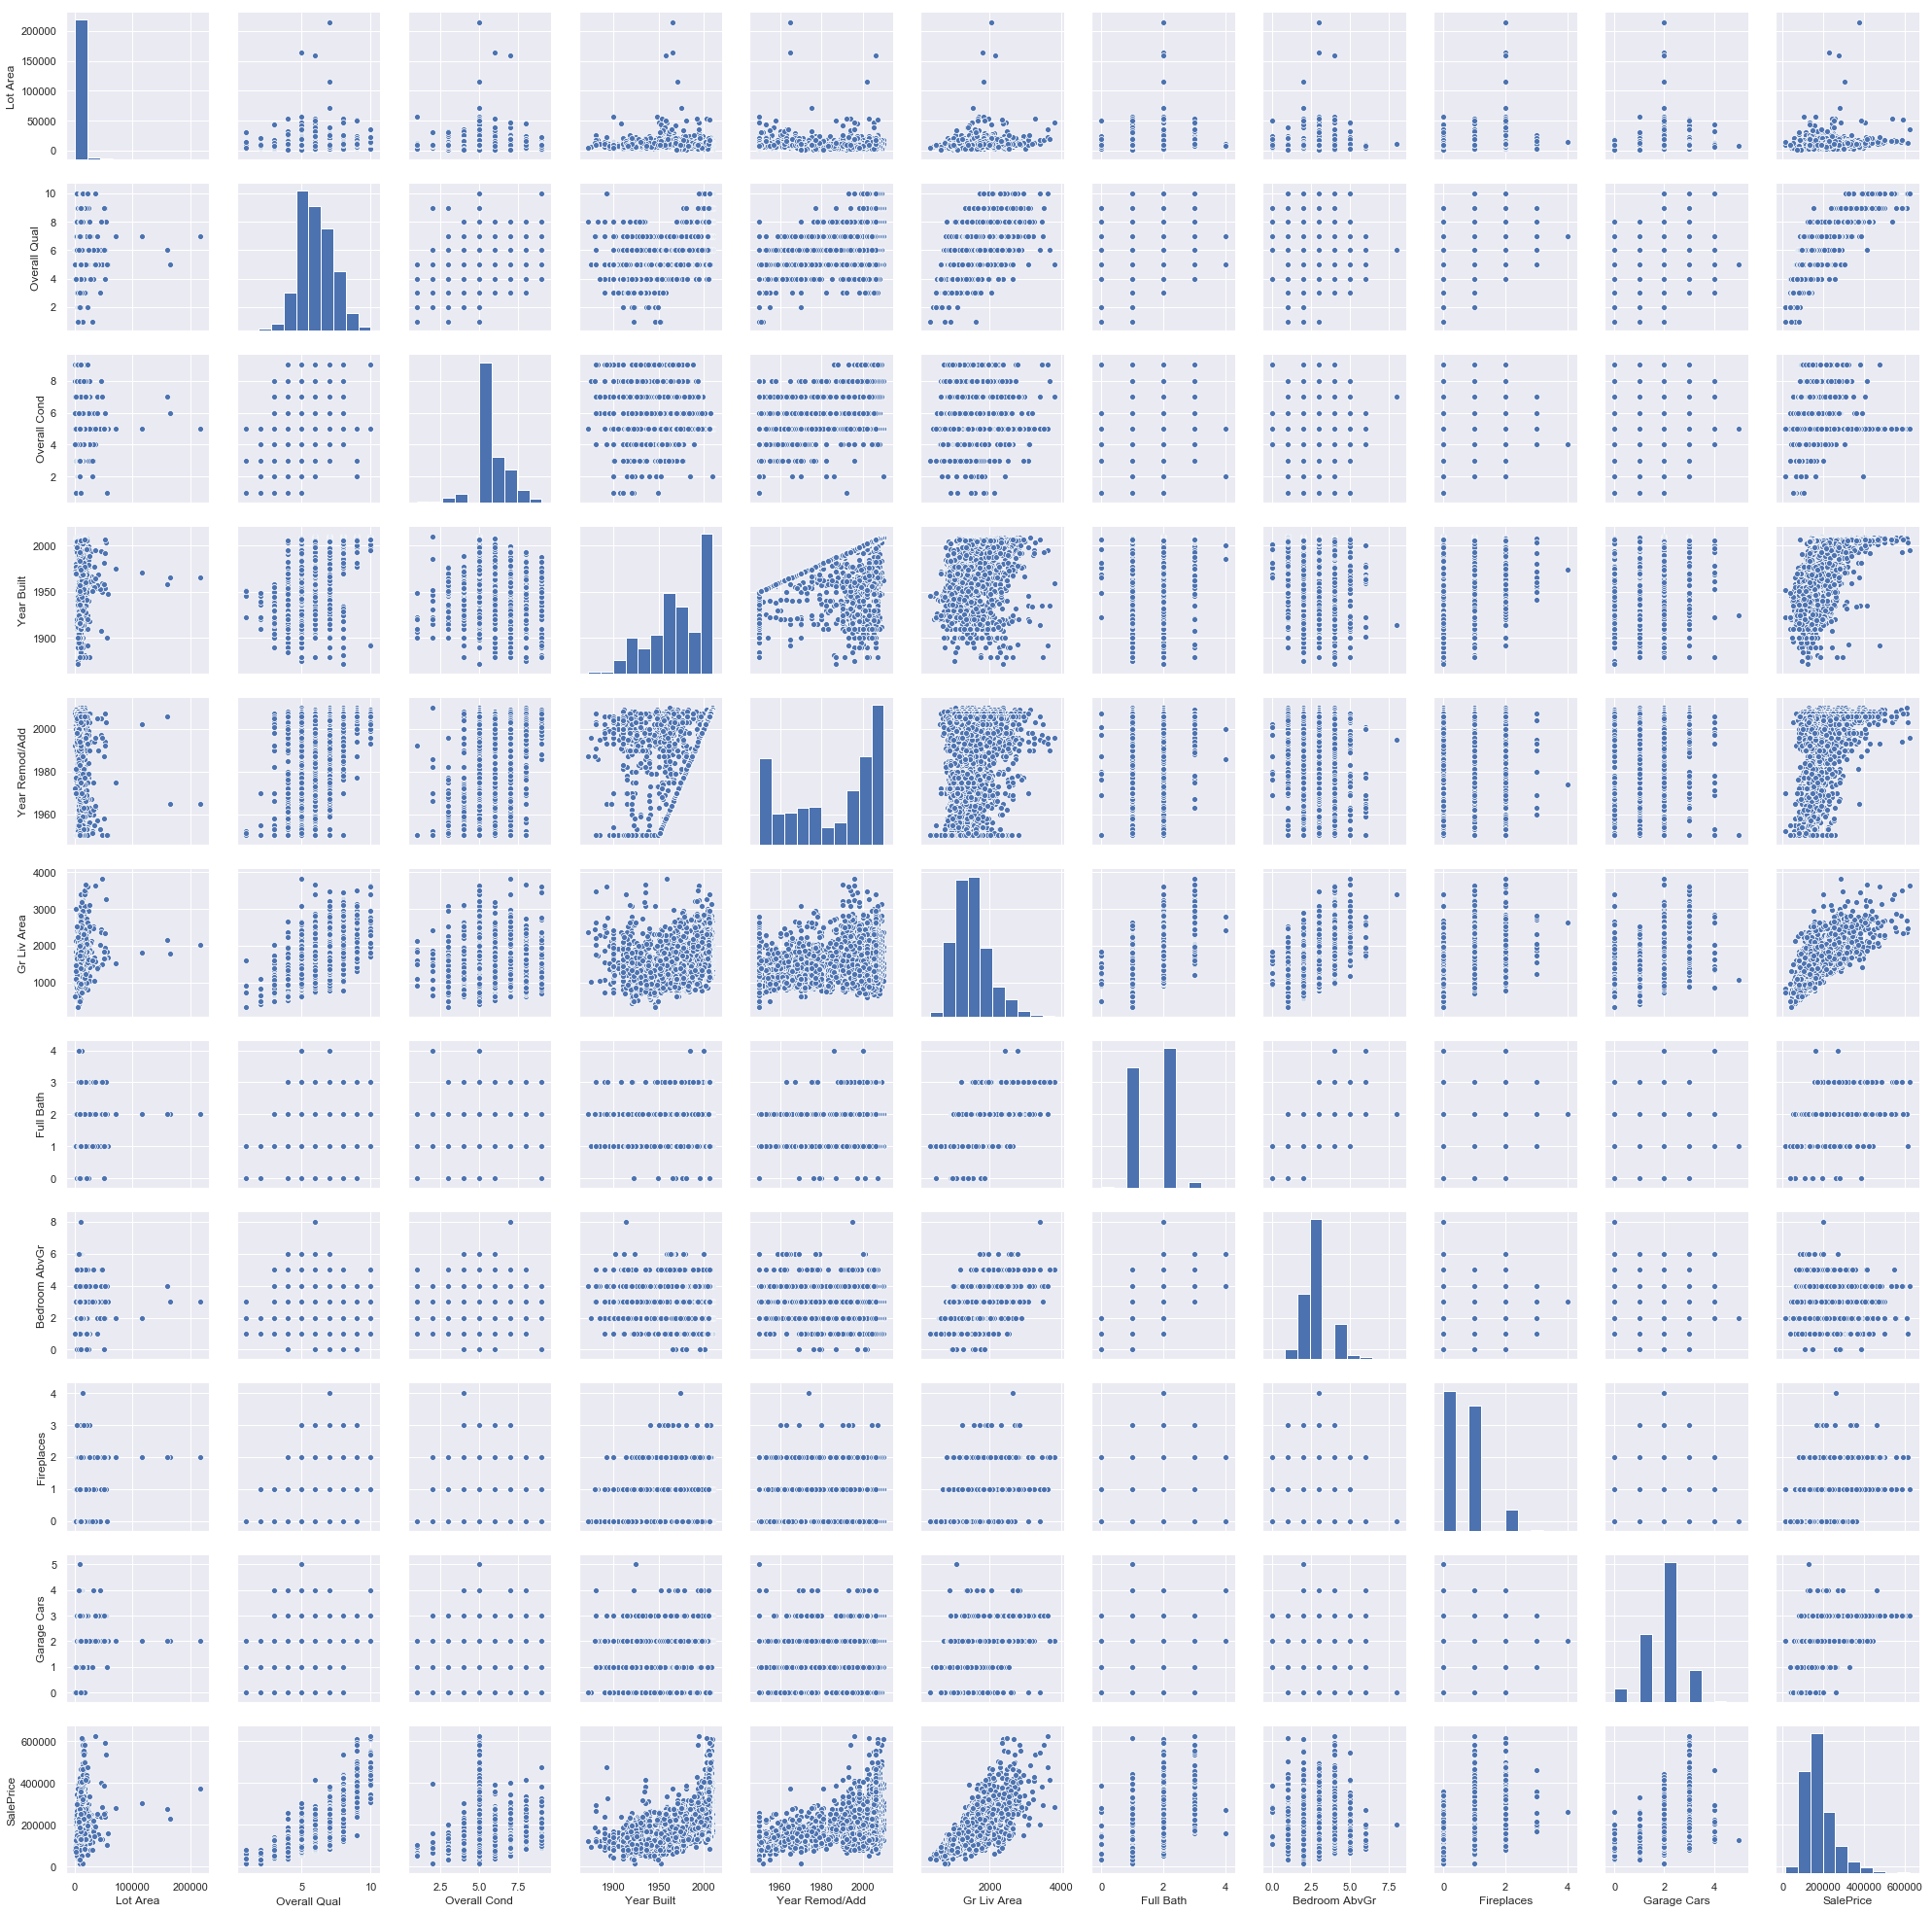

In [2]:
#some quick EDA

#pairwise relationships
sns.pairplot(df)

In [3]:
#correlations
df.corr()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
Lot Area,1.000000,0.083230,-0.032778,0.016983,0.015921,0.258582,0.121443,0.138178,0.247693,0.176104,0.270037
Overall Qual,0.083230,1.000000,-0.093810,0.596519,0.569793,0.565083,0.519032,0.061826,0.387025,0.598124,0.805239
Overall Cond,-0.032778,-0.093810,1.000000,-0.368489,0.048266,-0.116274,-0.214457,-0.006231,-0.030530,-0.181245,-0.103251
Year Built,0.016983,0.596519,-0.368489,1.000000,0.612151,0.239805,0.469171,-0.055578,0.167396,0.536607,0.565166
Year Remod/Add,0.015921,0.569793,0.048266,0.612151,1.000000,0.318747,0.456605,-0.021846,0.130953,0.424500,0.540441
Gr Liv Area,0.258582,0.565083,-0.116274,0.239805,0.318747,1.000000,0.637445,0.534226,0.449337,0.494262,0.719626
Full Bath,0.121443,0.519032,-0.214457,0.469171,0.456605,0.637445,1.000000,0.358719,0.226055,0.475957,0.544658
Bedroom AbvGr,0.138178,0.061826,-0.006231,-0.055578,-0.021846,0.534226,0.358719,1.000000,0.075924,0.090521,0.139792
Fireplaces,0.247693,0.387025,-0.030530,0.167396,0.130953,0.449337,0.226055,0.075924,1.000000,0.318991,0.474840
Garage Cars,0.176104,0.598124,-0.181245,0.536607,0.424500,0.494262,0.475957,0.090521,0.318991,1.000000,0.652546


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


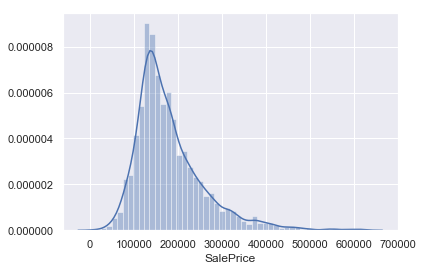

In [4]:
#distribution of the target variable - not terribly skewed
sns.distplot(df['SalePrice'])

In [5]:
#baseline model & OLS regression summary stats
X=df.loc[:,['Lot Area','Overall Qual','Overall Cond', 'Year Built', 'Year Remod/Add',
            'Gr Liv Area','Full Bath', 'Bedroom AbvGr','Fireplaces', 'Garage Cars']]

y=df['SalePrice']


model = sm.OLS(y,sm.add_constant(X))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     1336.
Date:                Tue, 09 Oct 2018   Prob (F-statistic):               0.00
Time:                        16:41:32   Log-Likelihood:                -34592.
No. Observations:                2924   AIC:                         6.921e+04
Df Residuals:                    2913   BIC:                         6.927e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -1.37e+06      8e+04    -17.114      0.000   -1.53e+06   -1.21e+06
Lot Area           1.1164      0.084     13.313      0.000       0.952       1.281
Overall Qual    1.983e+04    723.541     27.400      0.000    1.84e+04    2.12e+04
Overall Cond    4655.9884    661.435      7.039      0.000    3359.061    5952.915
Year Built       521.6675     34.572     15.089      0.000     453.880     589.455
Year Remod/Add   139.3090     43.599      3.195      0.001      53.822     224.796
Gr Liv Area       77.0196      2.359     32.652      0.000      72.394      81.645
Full Bath      -9568.6605   1656.598     -5.776      0.000   -1.28e+04   -6320.439
Bedroom AbvGr  -1.222e+04    975.849    -12.519      0.000   -1.41e+04   -1.03e+04
Fireplaces      6389.2260   1135.723      5.626      0.000    4162.325    8616.127
Garage Cars     1.045e+04   1115.816      9.366      0.000    8262.508    1.26e+04
==============================================================================
Omnibus:                      860.584   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6580.836
Skew:                           1.182   Prob(JB):                         0.00
Kurtosis:                       9.959   Cond. No.                     1.69e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So what should we report/present about this model, what's interesting or useful?

* **P values**: It's nice to be able to establish a strong sense that real relationship exists between each feature and the target.

* **R-squared / Adj. R-squared**: This is on training data so we ultimately prefer reporting R-squared on testing data, but the training evaluation is a good starting point.

* **The regression coefficients themselves**: For the purpose of *inference* that gives us insight into how changes in the features impact the target.

For the 3rd point, let's look at some math to be explicit about how we can state this.

Any machine learning or statistical model makes a set of assumptions about the function that maps the feature variables to the target variable. For linear regression, we assume the function is described by:

$$ y = \beta_0 + \beta_1 x_1 + ... + \beta_p x_p + \epsilon $$

The error term or residual $\epsilon$ is assumed to be normally distributed with mean $0$, meaning that on average $y$ should be equal to the linear expression involving the betas. Following this, we can also interpret what each coefficient $\beta_i$ means: **On average, increasing $x_i$ by 1 increases $y$ by $\beta_i$ **. For this model, it doesn't matter what the other feature values are, changing $x_i$ always has the same effect on the prediction.  

This ** very clear and clean interpretation of the model coefficients ** is a huge part of the appeal of linear regression. In a business setting, if we're asked how the model makes a decision or what the impact of each feature is, we can answer with ease. 

Based on the model above, if a home owner asks you "how much will my home's value go up by if I build an additional fireplace?", without knowing anything else about the home you can answer that your model expects the value to go up by $6,400 (with the important caveat that this assumes your model includes all characteristics relevant to the home's price - # of fireplaces could easily be a proxy for something that our dataset isn't capturing). 

### Complicating the story: is our simple interpretation really accurate?

If our goal is to have a readily explainable model with a decent fit, the OLS regression above is likely good enough. But what if the fit of the model is quite important? If we're a company that tries to price houses as accurately as possible, a simple model may be inadequate. 

Remember that an extremely useful diagnostic is looking at the residual plot:

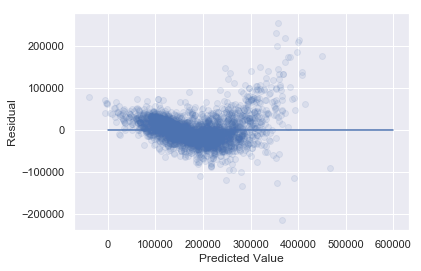

In [6]:
y_pred = results.predict(sm.add_constant(X))

plt.scatter(y_pred,y-y_pred,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

If our target was really a linear function of our features, the residual plot should show no clear patterns - the parabola-like trajectory of the residuals above points to non-linearity in the feature/target relationships. We can see additional direct evidence from plotting relationships between features and the target, like below:

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


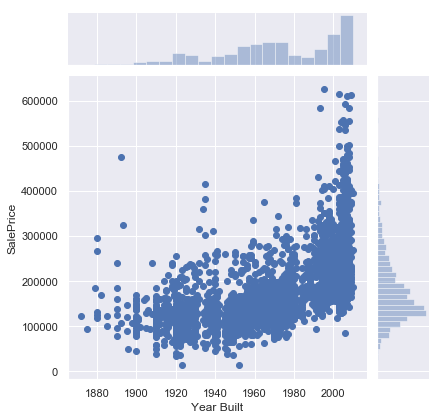

In [7]:
sns.jointplot('Year Built', 'SalePrice', data=df)

Seeing this, it's clear we should try adding polynomial terms if we want to use linear regression.

**Complexity tradeoff**: note here that using quick diagnostics and visual inspection we can get a sense of the direction to go in re: more or less complex. The residuals plot shows clear evidence of excess **bias** in our model caused by the imposition of a linear fit on a function that is really nonlinear.    

Let's do some validation and compare the basic model with a model that adds degree 2 polynomial terms.

In [8]:
def add_square_terms(df):    
    
    df_poly = df.copy()
    
    for c in df.columns:
        df_poly[c + '**2'] = df[c]**2
        
    return df_poly

In [9]:
from sklearn.metrics import mean_squared_error

def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(actual,predicted))   

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=3)

lm = LinearRegression()
lm.fit(X_train, y_train)
print('OLS regression score val R^2: %.3f' % lm.score(X_val, y_val))
print('OLS regression score val RMSE: %.3f \n' % RMSE(lm.predict(X_val), y_val))

lm.fit(add_square_terms(X_train), y_train)
print('Degree 2 polynomial regression val R^2: %.3f' 
      % lm.score(add_square_terms(X_val), y_val))
print('Degree 2 polynomial regression score val RMSE: %.3f' 
      % RMSE(lm.predict(add_square_terms(X_val)), y_val))

OLS regression score val R^2: 0.832
OLS regression score val RMSE: 31386.786 

Degree 2 polynomial regression val R^2: 0.887
Degree 2 polynomial regression score val RMSE: 25728.993


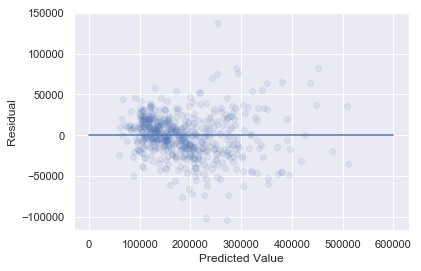

In [11]:
y_pred = lm.predict(add_square_terms(X_val))

plt.scatter(y_pred,y_val-y_pred,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

Unsurprisingly, adding the polynomial terms makes a significant improvement to the model's validation score, and the residuals plot looks much better. The improvement in fit translates into about **$5,000** less RMSE. Sounds like a significant amount of money! So we'd love to use this model to improve our predictive accuracy, and we can also extract some interpretation from it.  

We can still pull out the model coefficients, but the square terms make relating them to the original features a bit more complicated:   

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_1^2 + ... $$

$$ y = \beta_0 + (\beta_1  + \beta_2 x_1) x_1 + ... $$

So now the term $\beta_1  + \beta_2 x_1$ controls how much the target increases as $x_1$ increases, meaning that the change in the target resulting from a change in $x_1$ depends on the current value of $x_1$! (this is nonlinearity)

Now if the home owner asks us the same question: "how much will my home's value go up by if I build an additional fireplace?", we need additional information from them to answer -- how many fireplaces do they have now? And when we pull out the coefficients, well... they're a bit troubling! 

In [12]:
dict(zip(add_square_terms(X_train).columns, lm.coef_))

{'Bedroom AbvGr': 995.3188076317017,
 'Bedroom AbvGr**2': -1374.2936070476946,
 'Fireplaces': 4119.355471166555,
 'Fireplaces**2': 2830.2898418846016,
 'Full Bath': -9391.56058780883,
 'Full Bath**2': 1380.785754335918,
 'Garage Cars': -7206.104116955975,
 'Garage Cars**2': 4675.816212507236,
 'Gr Liv Area': 21.368463842515446,
 'Gr Liv Area**2': 0.012424877562449347,
 'Lot Area': 2.019165981266631,
 'Lot Area**2': -7.601690261309859e-06,
 'Overall Cond': 25001.33951255589,
 'Overall Cond**2': -1413.0226913279996,
 'Overall Qual': -42655.85476182567,
 'Overall Qual**2': 5134.468086052177,
 'Year Built': 4672.837958267195,
 'Year Built**2': -1.041233748021288,
 'Year Remod/Add': -45649.27985034212,
 'Year Remod/Add**2': 11.567339719668182}

Does it make sense to tell our client that if they have 3 fireplaces, building a new fireplace will increase the value of their home by ~ $24,000? That's how the math works out. But I thought our model was better than before? Well it is and it isn't. We've ** sacrificed clarity of interpretability in favor of predictive power**. This is an exceptionally common tradeoff in statistical modeling, and the **right choice to make always depends on the use case**.

(In this case, the seemingly unreasonable coefficients are likely driven by a combination of missing information and multicolinearities in the predictor variables. Fireplaces aren't really worth that much, but more fireplaces are associated with adjustments to the other characteristics, and the model's found coefficients that try to cobble everything together)    

### Interaction terms - yet another wrinkle in the story

Suppose our user hears our prediction, and asks "how could you answer that without knowing how large my home is? Surely the impact of an additional fireplace will differ depending on the size of my home?"

Here the user is pointing out that there could be an **interaction effect** between two features. If you study the original linear regression equation, it's clear that increasing a feature $x_i$ will have the same impact no matter what all the other $x_j$ values are. But what if we add products of features like $x_1x_2, x_2x_3$, etc?

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 $$

Notice that we can rewrite the equation above:

$$ y = \beta_0 + (\beta_1  + \beta_3 x_2) x_1 + \beta_2 x_2  $$

Looking at this equation, we can tell that features no longer have independent impacts: when $x_2$ gets larger, the multiplier $(\beta_1  + \beta_3 x_2)$ changes, so the effect of increasing $x_1$ also changes! 

In [13]:
from sklearn.preprocessing import PolynomialFeatures

interactions = PolynomialFeatures(degree=2, interaction_only=True)

lm.fit(interactions.fit_transform(X_train), y_train)
print('OLS regression with interaction terms val R^2: %.3f' % lm.score(interactions.transform(X_val), y_val))
print('OLS regression with interaction terms val RMSE: %.3f' 
      % RMSE(lm.predict(interactions.fit_transform(X_val)), y_val))

OLS regression with interaction terms val R^2: 0.888
OLS regression with interaction terms val RMSE: 25687.631


We did even a bit better than polynomial with only degree 1 + interaction terms (no square terms). Our user was right, interaction effects do seem to matter for this problem. 

So with a general problem, we may have to deal with many different nonlinear and interactive relationships... what a headache.

### Pushing to the limits of predictive power and losing the story

With around 10 features, it's not too much work to carefully study the visual relationships between features and targets and think about how the features might interact. But what if we have 100s or 1000s of features to parse? What if we have complicated multi-interactions between many different features, not just 2? We'd love a path toward **incorporating the full complexity of the features -> target relationship**. 

Should we spend all of our time selecting from 1000s of features? What about engineering all the right 5-way feature interactions? (A degree 5 polynomial would be 3000 columns just for our 10 features!)

Well we could, but there are faster ML methods for dealing with these issues -- in particular, **Tree Based Methods** whose very nice qualities include:

* Automatically model feature interactions
* Automatically model nonlinear relationships between features and target (no need for all the polynomial terms)
* Automatically select features / robust to useless features
* Robust to feature outliers
* Scale invariant (no need to standardize!)
* Natural handling of NA values

So uh, if these are so perfect, why have we been witholding them this whole time?! (Character building maybe?) Check out how easily we can train them and see that they outperform all of our previous models:

In [14]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=1800, max_features=3)
rf.fit(X_train, y_train)
rf.score(X_val, y_val)

0.8911225124606353

In [15]:
RMSE(rf.predict(X_val),y_val)

25282.27250513279

In [16]:
gbm = GradientBoostingRegressor(n_estimators=1600, max_depth=3, learning_rate=.01)
gbm.fit(X_train, y_train)
gbm.score(X_val, y_val)

0.8944364746864433

In [17]:
RMSE(gbm.predict(X_val),y_val)

24894.53424244131

But of course there's a catch. As powerful as these models are, they add notable computational cost and **sacrifice even more interpretability**. They don't give us anything in the form of coefficients or even tell us a directional relationship between a feature and the target (there is too much complex interaction to allow this in a simple form).

Now when our user asks us "how much will my home's value go up by if I build an additional fireplace?", we need even more extra info -- actually, we need to know everything about their house as is (all features), and then go rerun our model for this data point. 

In this particular case, the best RMSE above (GBM) is not even an $1,000 improvement to our RMSE from the polynomial fit. So is it worth using this model? **Only if predicitve accuracy is a much higher priority than explainability**. More generally, it might be a harder decision to make -- the tree model's improvement could be more drastic. 

Interpretation is not a completely lost cause. One partial remedy is looking at feature importance scores -- we'll learn more about these later, but for now know that they tell us how frequently used / useful to the model each feature is. Critically, they don't tell us anything about the nature of the relationship between that feature and the target, only that it can be an important determining factor.  

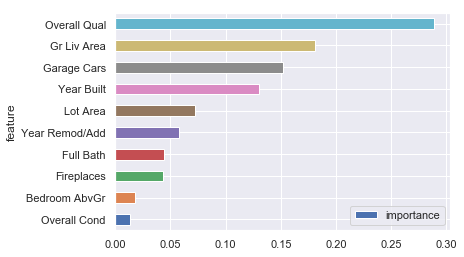

In [18]:
feat_imps = list(zip(X_train.columns,rf.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')

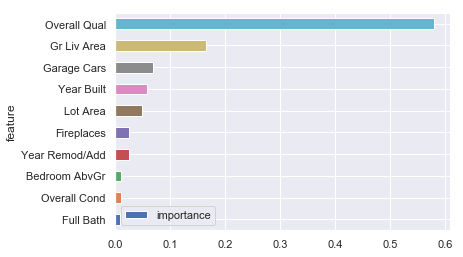

In [19]:
feat_imps = list(zip(X_train.columns,gbm.feature_importances_))
feat_imps = sorted(feat_imps, key = lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature','importance'])

feat_imps.plot(x='feature',y='importance',kind='barh')